<a href="https://colab.research.google.com/github/Deekshapoornashri25/python5731/blob/master/Copy_of_INFO5731_Assignment_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install pyLDAvis
import pyLDAvis
import spacy
import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim.corpora as corpora
import pyLDAvis.gensim
from nltk.tokenize import RegexpTokenizer
!pip install stop-words
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv("SentimentReview.csv")
df['Content_Text'] = df['Content_Text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['Content_Text'] = df['Content_Text'].str.replace('[^\w\s]','')
df['Content_Text'] = df['Content_Text'].str.lower()
df

<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<input>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-5-0811334411a2>:3: DeprecationWarning: invalid escape sequence \w
  df['Content_Text'] = df['Content_Text'].str.replace('[^\w\s]','')


,Document_ID,Content_Text,Sentiment
0,0,amaz movi exist,Positive
1,1,went second time watch,Positive
2,2,psycholog studi rather superhero flick,Positive
3,3,joaquin oscar joker best dark suspens thriller...,Positive
4,4,venic review,Neutral
...,...,...,...
95,95,outstand movi haunt perform best charact devel...,Positive
96,96,certain peopl relat,Neutral
97,97,perfect everi aspect,Positive
98,98,hype real,Positive


In [ ]:
def sentence(sentences):
  for sent in sentences:
    yield(gensim.utils.simple_preprocess(str(sent), deacc=True))
datalist = df.Content_Text.values.tolist()
words = list(sentence(datalist))
words

[['amaz', 'movi', 'exist'],
 ['went', 'second', 'time', 'watch'],
 ['psycholog', 'studi', 'rather', 'superhero', 'flick'],
 ['joaquin',
  'oscar',
  'joker',
  'best',
  'dark',
  'suspens',
  'thriller',
  'darker',
  'dark',
  'knight'],
 ['venic', 'review'],
 ['final', 'real', 'movi'],
 ['good', 'lord'],
 ['spoon', 'feed', 'cgi', 'fuel', 'faux', 'drama'],
 ['represint', 'real', 'life', 'joker'],
 ['oscar', 'phoenix'],
 ['critic', 'useless'],
 ['joker', 'endgam'],
 ['would', 'call', 'masterpiec'],
 ['one', 'best', 'act', 'perform', 'ive', 'ever', 'seen'],
 ['dont', 'forget', 'smile'],
 ['ok', 'film'],
 ['thought',
  'this',
  'film',
  'was',
  'good',
  'but',
  'just',
  'dont',
  'get',
  'the',
  'hype'],
 ['extrem', 'overr'],
 ['believ', 'hype'],
 ['masterpiec'],
 ['great'],
 ['great', 'dont', 'know'],
 ['that', 'life'],
 ['extrem', 'overr'],
 ['requiem', 'broken', 'man'],
 ['rise', 'joker'],
 ['brilliant', 'best', 'joker', 'ive', 'ever', 'seen'],
 ['movi', 'decad'],
 ['omg', 'g

In [ ]:
bigram = gensim.models.Phrases(words, min_count=5,threshold=60)
trigram = gensim.models.Phrases(bigram[words],threshold=60)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','use','edu','re','at'])
def remove(texts):
  return[[word for word in simple_preprocess(str(doc)) if word not in stop_words]for doc in texts]
def bigrams(texts):
  return[bigram_mod[doc] for doc in texts]
def trigrams(texts):
  return[trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['ADJ','ADV','NOUN','VERB']):
  texts_out=[]
  for sent in texts:
    doc = nlp(" ".join(sent))
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
  return texts_out

In [ ]:
nostops = remove(words)
word_bigrams = bigrams(nostops)
nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])
data_lemmatized = lemmatization(word_bigrams, allowed_postags=['ADJ','ADV','NOUN','VERB'])
data_lemmatized

[['exist'],
 ['go', 'second', 'time', 'watch'],
 ['rather', 'superhero'],
 ['good', 'dark', 'suspen'],
 ['review'],
 ['final', 'real', 'movi'],
 ['good'],
 ['feed', 'cgi', 'fuel', 'faux', 'drama'],
 ['real', 'life', 'joker'],
 [],
 ['critic', 'useless'],
 [],
 ['would', 'call'],
 ['good', 'act', 'perform', 'have', 'ever', 'see'],
 ['forget', 'smile'],
 ['film'],
 ['think', 'good', 'hype'],
 ['extrem', 'overr'],
 [],
 [],
 ['great'],
 ['great', 'know'],
 ['life'],
 ['extrem', 'overr'],
 ['requiem', 'broken', 'man'],
 ['rise'],
 ['brilliant', 'best', 'joker', 'have', 'ever', 'see'],
 [],
 ['old', 'peopl', 'get', 'stupid'],
 [],
 ['probabl',
  'good',
  'comic',
  'book',
  'perform',
  'make',
  'speechless',
  'end',
  'venic'],
 ['perform', 'have', 'come', 'know'],
 ['see', 'tonight', 'make', 'account', 'tell', 'everyon', 'good'],
 [],
 [],
 ['anyon', 'rate', 'cinema'],
 ['best', 'movi', 'ever'],
 [],
 [],
 ['astonish'],
 [],
 ['feel', 'everyon', 'brain', 'wash'],
 ['make', 'account', 

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
stop = get_stop_words('en')
stop1 = ['joker', 'joaquin']
stemmer = PorterStemmer()
review = [review for review in df['Content_Text']]
texts = []
for i in review:
  token = tokenizer.tokenize(i)
  stopped = [review for review in token if not review in stop + stop1]
  texts.append(stopped)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics = 20, id2word = dictionary,passes=60)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
for topic in lda.print_topics(num_topics=10,num_words=5):
  print(topic)

(14, '0.045*"phoenix" + 0.045*"movi" + 0.023*"hype" + 0.023*"real" + 0.023*"masterpiec"')
(11, '0.222*"masterpiec" + 0.039*"anyon" + 0.039*"hail" + 0.039*"bewar" + 0.039*"crime"')
(7, '0.042*"done" + 0.042*"thing" + 0.042*"dark" + 0.042*"dc" + 0.042*"best"')
(2, '0.055*"best" + 0.052*"dark" + 0.052*"movi" + 0.027*"overr" + 0.027*"titl"')
(9, '0.095*"overhyp" + 0.033*"millenni" + 0.033*"proper" + 0.033*"compar" + 0.033*"overact"')
(15, '0.103*"hype" + 0.062*"dont" + 0.042*"believ" + 0.042*"get" + 0.021*"depress"')
(13, '0.104*"bad" + 0.036*"book" + 0.036*"hour" + 0.036*"mood" + 0.036*"comic"')
(8, '0.079*"mesmer" + 0.079*"crimin" + 0.079*"outsid" + 0.004*"write" + 0.004*"sheep"')
(17, '0.088*"joke" + 0.045*"spectacular" + 0.045*"endgam" + 0.045*"everyon" + 0.045*"awesom"')
(12, '0.055*"cgi" + 0.055*"galor" + 0.055*"overact" + 0.055*"spoon" + 0.055*"faux"')


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.save_html(vis, "filename.html")
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15     0.161970  0.129031       1        1  10.045661
14    -0.046714  0.137653       2        1   9.752246
5     -0.118199  0.078010       3        1   9.188244
16    -0.169001 -0.038393       4        1   8.499457
2     -0.095297  0.068266       5        1   8.192886
9     -0.005738 -0.174616       6        1   5.663896
13     0.029763  0.031315       7        1   5.313479
3     -0.163355 -0.047407       8        1   5.122465
1     -0.026088  0.084193       9        1   5.047136
7     -0.036557 -0.013411      10        1   4.380940
11     0.073091  0.011771      11        1   4.340921
17     0.070449 -0.102762      12        1   3.733576
19    -0.001228  0.024475      13        1   3.627644
6      0.055926  0.042011      14        1   3.380469
12     0.055950 -0.083161      15        1   3.020636
18     0.047716 -0.050883      16        1   2.832312
4      0.042135  0.016222      17        1   2.424725
10     0.081358 -0.010483      18        1   2.156363
0      0.009996 -0.065091      19        1   1.756175
8      0.033821 -0.036739      20        1   1.520770, topic_info=          Term       Freq      Total Category  logprob  loglift
38  masterpiec   6.000000   6.000000  Default  30.0000  30.0000
45        dont   5.000000   5.000000  Default  29.0000  29.0000
48        film   5.000000   5.000000  Default  28.0000  28.0000
33     phoenix   5.000000   5.000000  Default  27.0000  27.0000
2         movi  12.000000  12.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
52        just   0.020315   1.883575  Topic20  -5.5797  -0.3436
73        book   0.020315   2.003594  Topic20  -5.5797  -0.4054
76        make   0.020315   2.687689  Topic20  -5.5797  -0.6991
75         end   0.020315   1.360527  Topic20  -5.5797  -0.0183
88         saw   0.020315   1.174751  Topic20  -5.5797   0.1285

[882 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
189       2  0.735009  absolut
86       13  0.575408  account
86       14  0.575408  account
39        1  0.375899      act
39        4  0.375899      act
...     ...       ...      ...
85        1  0.757775   worthi
134       3  0.768721    write
126       5  0.511777     year
126       8  0.511777     year
103       8  0.821329     yike

[288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 15, 6, 17, 3, 10, 14, 4, 2, 8, 12, 18, 20, 7, 13, 19, 5, 11, 1, 9])

If any unnecessary characters were present they were removed from the list and 
tokenization was performed.
Bigram, trigram and other n grams can be implemented for gensim's phrase model with thersold, as thersold is important. The greater the thersold value better it is which will give few phrases.
In a LDA model dictionary and corpus are first created giving the num_topics which is 20 here. Passes and num_words were also used to build the LDA model using gensims.
Passes was given 60 it decides the training of the model in the corpus and num_words was given 5 displaying the keywords of the topic
The LDA model is built with 20 topics from top and it is a combination of keywords and the contribution of all the keywords.


Just amazing. How does this movie exist.
I feel like everyone is brain washed.
Only certain people can relate.
Kind of a letdown.
Best dc movie since the dark knight Rises
Joaquin oscar joker is best Dark suspense thriller. Darker than dark knight.
Stop comparing it with Endgame
Perfect in every aspect.
I don't get it
The hype is real

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datascience
import seaborn as sns
from stop_words import  get_stop_words
stop_words = get_stop_words('en')


/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
df = pd.read_csv("SentimentReview.csv")
sns.factorplot(x='Sentiment', data=df,aspect=1.5, size= 5, kind="count")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
df['Content_Text'] = df['Content_Text'].apply(lambda x: " ".join(x for x in str(x).split() if not x.isdigit() and not x.isspace()))
df['Content_Text'] = df['Content_Text'].str.replace('[^\w\s]','')
df['Content_Text'] = df['Content_Text'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-18-c467c3604124>:2: DeprecationWarning: invalid escape sequence \w
  df['Content_Text'] = df['Content_Text'].str.replace('[^\w\s]','')


In [ ]:
df

,Document_ID,Content_Text,Sentiment
0,0,amaz movi exist,positive
1,1,went second time watch,positive
2,2,psycholog studi rather superhero flick,positive
3,3,joaquin oscar joker best dark suspens thriller...,positive
4,4,venic review,neutral
...,...,...,...
95,95,outstand movi haunt perform best charact devel...,positive
96,96,certain peopl relat,neutral
97,97,perfect everi aspect,positive
98,98,hype real,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(analyzer= 'word',lowercase = False)
features = v.fit_transform(df['Content_Text'])
features_nd = features.toarray()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
att1 = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(features_nd,att1,test_size = 0.20)
linear_model = LogisticRegression()
linear_model.fit(x_train,y_train)
y_LR = linear_model.predict(x_test)
#linear_model.intercept_,linear_model.coef_

In [ ]:
acc = accuracy_score(y_test, y_LR)
print('Accuracy is: ',acc*100)
prec = precision_score(y_test, y_LR, average='macro')
print('Precision is: ',prec*100)
rec = recall_score(y_test, y_LR, average='macro')
print('Recall is: ',rec*100)
f1 = f1_score(y_test, y_LR, average='macro')
print('F1 Score is: ', f1*100)

Accuracy is:  55.00000000000001
Precision is:  30.718954248366014
Recall is:  38.88888888888889
F1 Score is:  32.098765432098766


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train,y_train)
y_NB = naive_bayes_model.predict(x_test)

In [ ]:
acc = accuracy_score(y_test, y_NB)
print('Accuracy is: ',acc*100)
prec = precision_score(y_test, y_NB, average='macro')
print('Precision is: ',prec*100)
rec = recall_score(y_test, y_NB, average='macro')
print('Recall is: ',rec*100)
f1 = f1_score(y_test, y_NB, average='macro')
print('F1 Score is: ', f1*100)

Accuracy is:  35.0
Precision is:  34.722222222222214
Recall is:  35.0
F1 Score is:  33.45238095238095


The feature used for sentiment classification are titles which have been processed and cleaned, they're the 100 reviews of the movie joker and the sentiments. 3 types of sentiments are there here i.e. positive, negative and neutral. These features give better accuarcy depending on the relationship of the features hence I opted these features. The process for the feature selection was first the data was divided into sentiment and context text which are dependent and independent respectively. tf-idf was used to select the geatures. There are other techiques also to select the features like chi-square etc. I have selected logistic regression and Gussian naive bayes to build a sentiment classifier. The accuracy, precision, recall and f1 score are calculated for both the algorithm.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [ ]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:

df1 = pd.read_csv("test.csv")
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
df1.shape

(1459, 80)

In [ ]:
df1.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]>

In [ ]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
matrix = df.corr()
matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [ ]:
matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


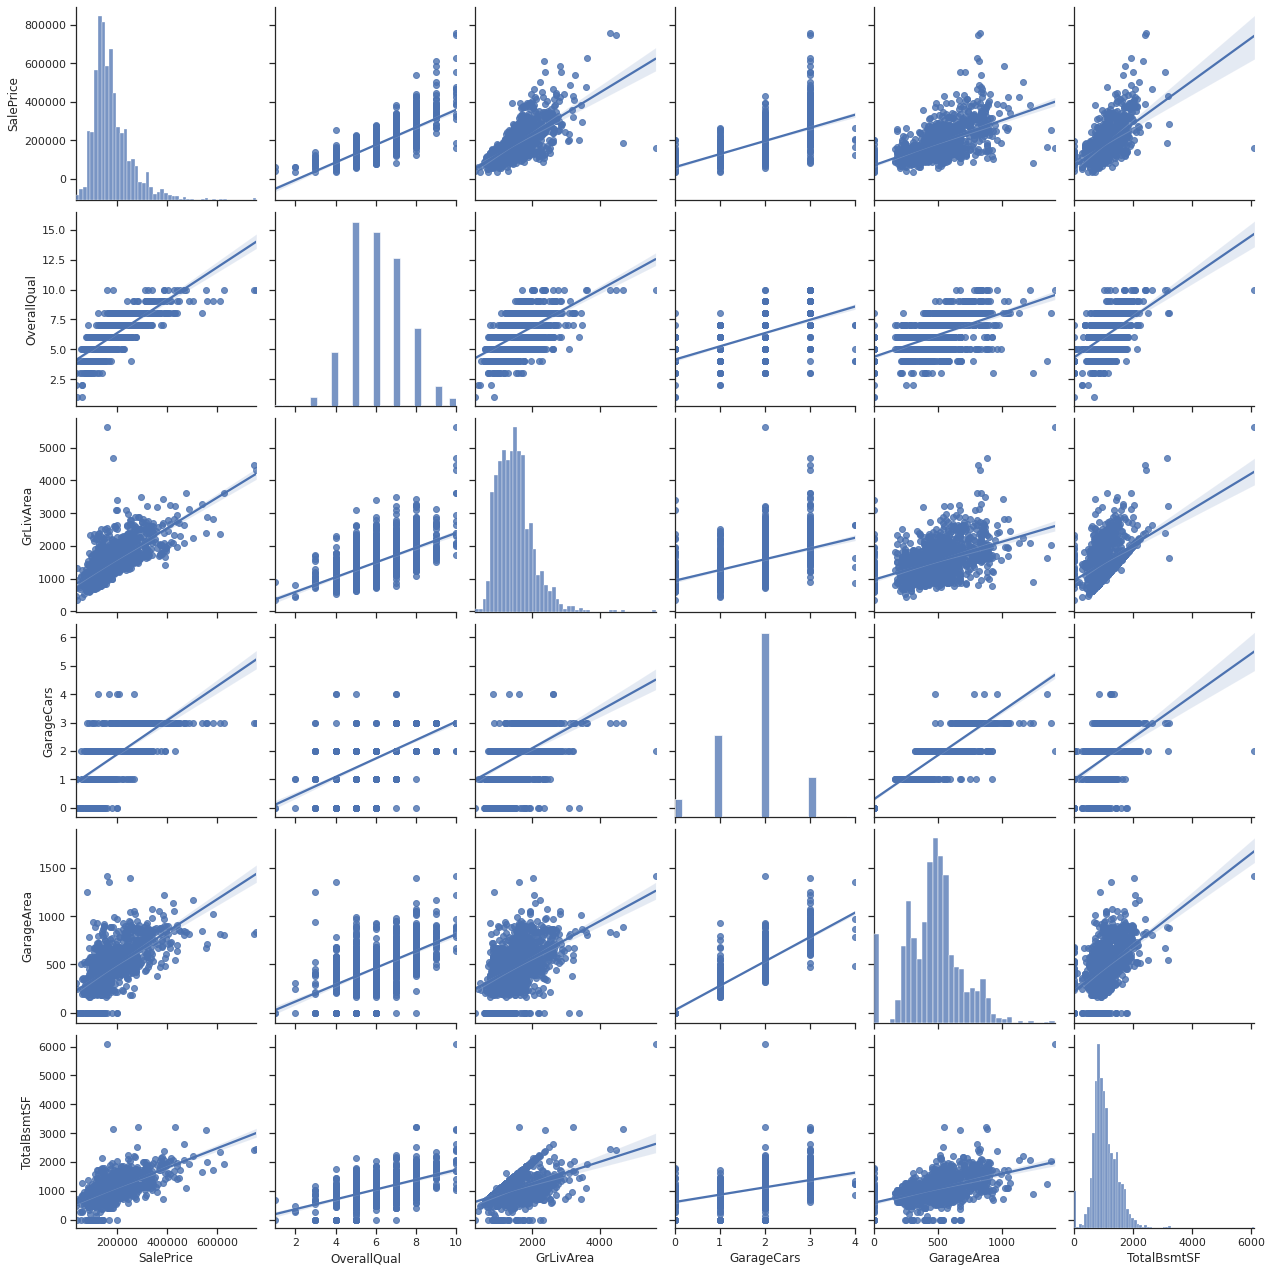

In [ ]:
col = ["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]
sns.set(style='ticks')
sns.pairplot(df[col],size=3,kind='reg')

In [ ]:
print("The most important features")
matrix = df.corr()
matrix.sort_values(['SalePrice'],ascending=False,inplace=True)
matrix.SalePrice

The most important features


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:

noneval = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:20])
noneval.columns = ['Null Count']
noneval

,Null Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
df = df.select_dtypes(include=[np.number]).interpolate().dropna()
df1 = df1.select_dtypes(include=[np.number]).interpolate().dropna()
a1 = df.drop(['SalePrice','Id'], axis=1)
a2 = np.log(df.SalePrice)
x_train, x_test, y_train, y_test = train_test_split(a1,a2, random_state= 42, test_size=0.2)
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_LR = linear_model.predict(x_test)
linear_model.intercept_,linear_model.coef_

(13.988866348992978,
 array([-7.65018361e-04, -5.95665261e-04,  1.87661534e-06,  8.57816051e-02,
         4.42889038e-02,  2.93084751e-03,  1.31197093e-03, -2.09282654e-05,
         2.17519038e-05,  6.09968394e-06,  4.57918851e-06,  3.24307762e-05,
         4.47322844e-05,  1.88316389e-05,  8.76394091e-05,  1.51203332e-04,
         7.24527026e-02,  1.55431436e-02,  3.24099866e-02,  2.21788209e-02,
         1.96120990e-03, -4.47403482e-02,  1.43675969e-02,  4.95230875e-02,
        -3.29262408e-04,  7.44644907e-02,  3.83372117e-05,  1.20796329e-04,
        -4.00325519e-05,  1.50880502e-04,  2.94041692e-04,  3.29046241e-04,
        -4.00360397e-04, -2.49339566e-06,  3.09082461e-04, -5.51616325e-03]))

In [ ]:
print('Linear Regression:', linear_model.score(x_test,y_test))

Linear Regression: 0.8758658336149933


In [ ]:
MSE = np.square(np.subtract(y_test,y_LR)).mean()
print("Mean Squared Error:", MSE)

Mean Squared Error: 0.023165113523875666


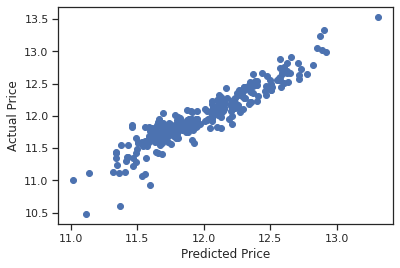

In [ ]:
plt.scatter(y_LR,y_test,alpha=1)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

In [ ]:
prediction = pd.DataFrame()
prediction['Id'] = df1.Id
df1 = df1.select_dtypes(include=[np.number]).interpolate().drop(['Id'],axis=1)
ab = linear_model.predict(df1)
final = np.exp(ab)

In [ ]:
prediction['SalePrice'] = final
prediction

,Id,SalePrice
0,1461,117002.268384
1,1462,138140.347277
2,1463,167676.575158
3,1464,194355.580811
4,1465,181338.246909
...,...,...
1454,2915,95269.993842
1455,2916,96602.380503
1456,2917,173227.002415
1457,2918,111975.932793
